In [1]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

shap.initjs()
np.random.seed(0)

In [10]:
df = pd.read_csv('winequality-red.csv') # ,sep=';')

In [47]:
df.shape

(1599, 12)

In [11]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


<AxesSubplot:>

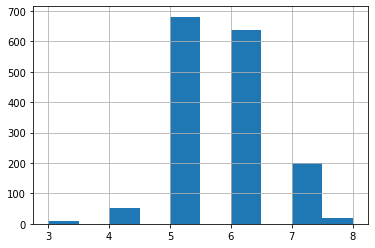

In [13]:
print(df.columns)
#df['quality'] = df['quality'].astype(int)
df['quality'].hist()

In [14]:
df.shape

(1599, 12)

In [ ]:
#Y = df['quality']
#X =  df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
#       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
#       'pH', 'sulphates', 'alcohol']]

In [15]:
y = df['quality']
X = df.copy()
X.drop(columns='quality', inplace=True)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)
print(X_test.shape)
print(X_test.mean())
print(X_test.iloc[10,:])

(320, 11)
fixed acidity            8.421563
volatile acidity         0.527141
citric acid              0.271031
residual sugar           2.568281
chlorides                0.087331
free sulfur dioxide     16.440625
total sulfur dioxide    47.229687
density                  0.996780
pH                       3.306938
sulphates                0.677250
alcohol                 10.532083
dtype: float64
fixed acidity            7.6000
volatile acidity         0.6200
citric acid              0.3200
residual sugar           2.2000
chlorides                0.0820
free sulfur dioxide      7.0000
total sulfur dioxide    54.0000
density                  0.9966
pH                       3.3600
sulphates                0.5200
alcohol                  9.4000
Name: 306, dtype: float64


In [49]:
#################
# Random Forest #
#################
rf = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
rf.fit(X_train, Y_train)  
print(rf.feature_importances_)

[0.0228107  0.12268078 0.01973459 0.01517253 0.03924142 0.0339037
 0.07214286 0.0405428  0.03751116 0.19566989 0.40058957]


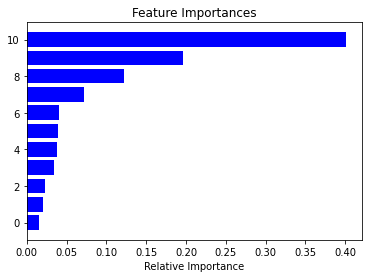

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
53,8.6,0.38,0.36,3.0,0.081,30.0,119.0,0.997,3.2,0.56,9.4


In [50]:
importances = rf.feature_importances_
indices = np.argsort(importances)

features = X_train.columns

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
#plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

X_test[0:1]

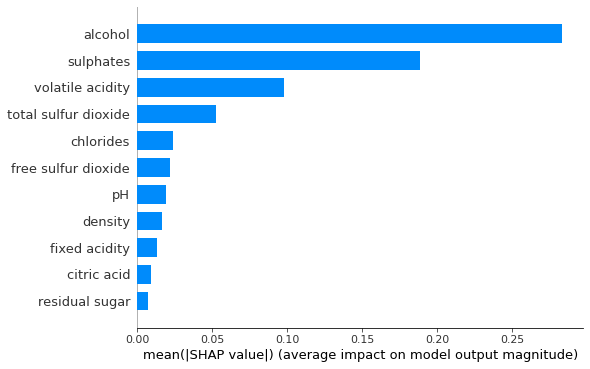

In [51]:
shap_values = shap.TreeExplainer(rf).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

Can the above variable importance plot show the directions between the features and the target variable? Yes, that's the power of the Shap value plot as shown below. This plot is made of many dots. Each dot has three characteristics. The graph below plots the SHAP values of every feature for every sample. It shorts features by the total of absolute SHAP values over all samples. The color represents the feature value (red high, blue low).

* The vertical location shows the feature importance.
* The horizontal location shows whether the effect of that value caused a higher or lower prediction.
* Color shows whether that feature was high or low for that observation


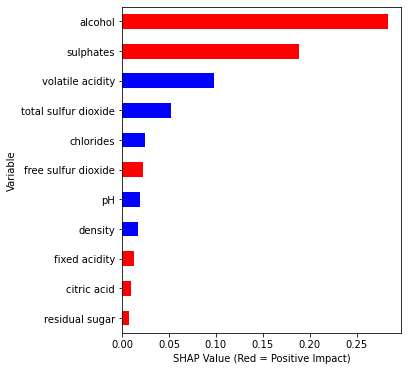

In [52]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
ABS_SHAP(shap_values,X_train)

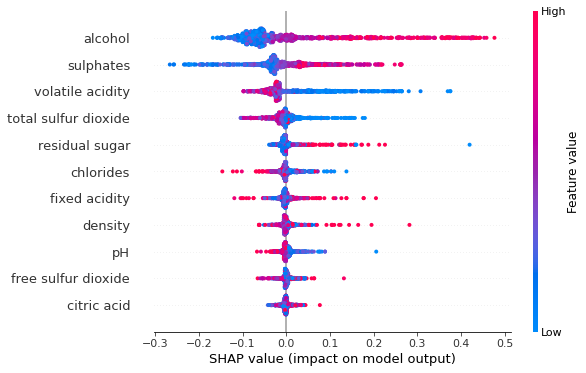

In [75]:
#f = plt.figure()
shap.summary_plot(shap_values, X_train)
#f.savefig("/summary_plot1.png", bbox_inches='tight', dpi=600)

We can describe the model. A high quality rating of wine is associated with the following characteristics:

* High alcohol content
* High sulphates
* Low volatile acidity
* Low total sulfuer dioxide
* Low pH
* Low chlorides
* Low citric acid
* Low density
* High fixed acidity content
* High free sulfur dioxide
* High residual sugar

You may ask how to show a partial dependence plot. The partial dependence plot shows the marginal effect one or two features have on the predicted outcome of a machine learning model (J. H. Friedman 2001). It tells whether the relationship between the target and a feature is linear, monotonic or more complex. In order to create a dependence plot, you only need one line of code: ``shap.dependence_plot(“alcohol”, shap_values, X_train)``. The function automatically includes another variable that your chosen variable interacts most with. The following plot shows there is an approximately linear and positive trend between “alcohol” and the target variable, and “alcohol” interacts with “sulphates” frequently.

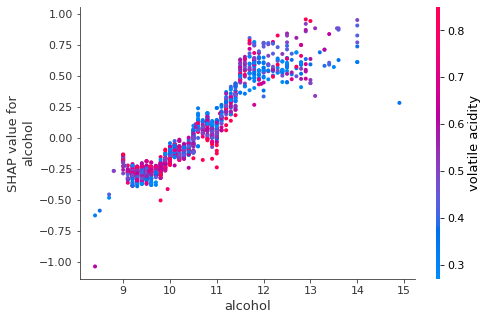

In [32]:
# we pass "Age" instead of an index because dependence_plot() will find it in X's column names for us
# Systolic BP was automatically chosen for coloring based on a potential interaction to check that 
# the interaction is really in the model see SHAP interaction values below
shap.dependence_plot("alcohol", shap_values, X_train)

Suppose you want to know “volatile acidity” and the variable that it interacts the most, you can do `shap.dependence_plot(“volatile acidity”, shap_values, X_train)`. The plot below shows there exists an approximately linear but negative relationship between “volatile acidity” and the target variable. This negative relationship is already demonstrated in the variable importance plot Exhibit (K).

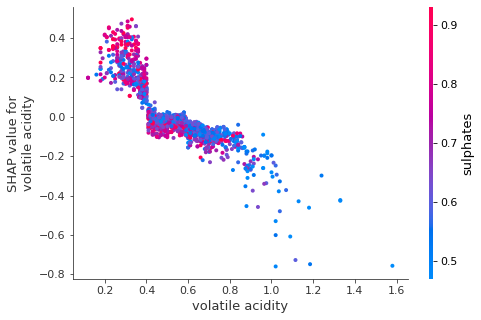

In [33]:
# we pass display_features so we get text display values for sex
shap.dependence_plot("volatile acidity", shap_values, X_train)

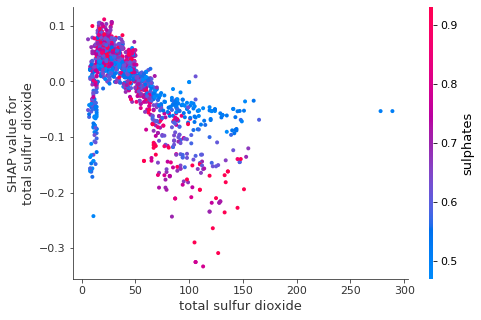

In [34]:
shap.dependence_plot("total sulfur dioxide", shap_values, X_train, show=False)
plt.show()

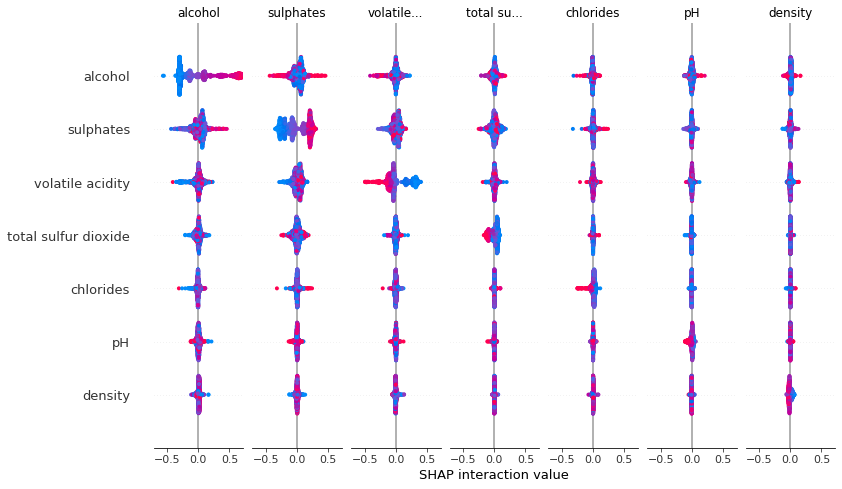

In [36]:
# takes a couple minutes since SHAP interaction values take a factor of 2 * # features
# more time than SHAP values to compute, since this is just an example we only explain
# the first 2,000 people in order to run quicker
shap_interaction_values = shap.TreeExplainer(rf).shap_interaction_values(X_train.iloc[:2000,:])

shap.summary_plot(shap_interaction_values, X_train.iloc[:2000,:])

In [54]:
X_output = X_test.copy()
X_output.loc[:,'predict'] = np.round(rf.predict(X_output),2)
X_output.shape

(320, 12)

In [55]:
random_picks = np.arange(1,330,50)
S = X_output.iloc[random_picks]
S

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,predict
825,7.1,0.46,0.14,2.8,0.076,15.0,37.0,0.99624,3.36,0.49,10.7,5.64
1534,6.6,0.56,0.14,2.4,0.064,13.0,29.0,0.99397,3.42,0.62,11.7,6.02
510,12.4,0.42,0.49,4.6,0.073,19.0,43.0,0.99780,3.02,0.61,9.5,5.39
737,8.2,0.59,0.00,2.5,0.093,19.0,58.0,1.00020,3.50,0.65,9.3,5.39
1222,8.1,0.53,0.22,2.2,0.078,33.0,89.0,0.99678,3.26,0.46,9.6,5.12
1544,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,6.80
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.22


In [60]:
def shap_plot(j):
    explainerModel = shap.TreeExplainer(rf)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

Let me walk you through the above code step by step. The above `shap.force_plot()` takes three values: the base value (`explainerModel.expected_value[0]`), the SHAP values (`shap_values_Model[j][0]`) and the matrix of feature values (`S.iloc[[j]]`). The base value or the expected value is the average of the model output over the training data `X_train`. It is the base value used in the following plot.

In [62]:
shap_plot(0)

* *Output* value: is the prediction for that observation

* Base value: The original paper explains that the base value E(y_hat) is "the value that would be predicted if we did not know any features for the current output." In other words, it is the mean prediction, or mean(yhat). So the mean prediction of Y_test is 5.62.

* Features: The above explanation shows features that contributes to push the final prediction away from the base value.

* Red/blue: Those features that push the prediction higher (to the right) are shown in red, and those pushing the prediction lower are in blue.

* Alcohol: has positive impact on the quality rating. The alcohol of this wine is 11.8 which is higher than the average value 10.41. So it pushes the prediction to the right.

* pH: has a negative impact on the quality rating. A lower than the average pH (=3.26 <3.30) drives the prediction to the right.

* Sulphates: is positively related to the quality rating. A lower than the average Sulphates (= 0.64 < 0.65) pushes the prediction to the left.

* You may wonder how we know the average values of the predictors. Remember the SHAP model is built on the training data set. The means of the variables are: `X_train.mean()`

In [76]:
X_train.mean()

fixed acidity            8.322596
volatile acidity         0.527658
citric acid              0.270797
residual sugar           2.527091
chlorides                0.086894
free sulfur dioxide     15.730649
total sulfur dioxide    45.874902
density                  0.996722
pH                       3.311509
sulphates                0.656099
alcohol                 10.437855
dtype: float64

In [77]:
Y_test.mean()

0.134375

In [63]:
shap_plot(1)

In [64]:
shap_plot(2)

In [65]:
shap_plot(3)

In [67]:
fig = shap_plot(4)

In [68]:
fig

## The SHAP Works for Binary Target as Well

In [74]:
# Suppose the target is a binary variable
df['quality_bin'] = np.where(df['quality'].astype(int)>6, 1, 0)

[0.06786396 0.11302914 0.04258234 0.05861332 0.06767874 0.03928911
 0.08502502 0.05802154 0.03225023 0.17352605 0.26212056]


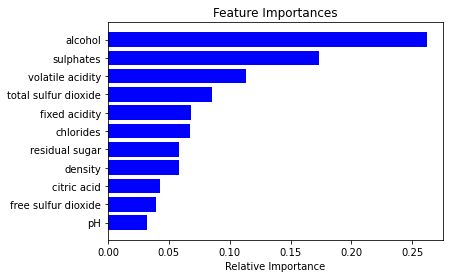

In [71]:
Y = df['quality_bin']
X =  df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)  
print(model.feature_importances_)

importances = model.feature_importances_
indices = np.argsort(importances)

features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [72]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)

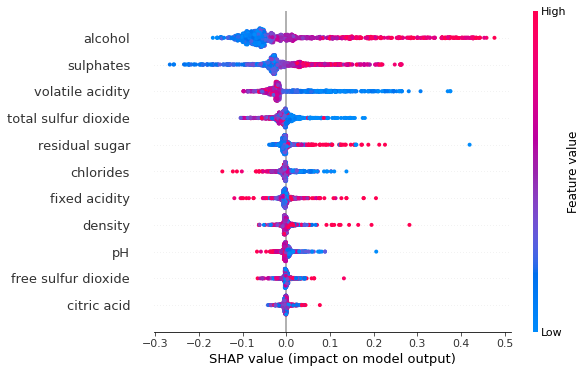

In [73]:
shap.summary_plot(shap_values, X_train)

[0.02771784 0.14608857 0.0098873  0.03979135 0.03834853 0.02349039
 0.07114265 0.01940386 0.04327445 0.20548462 0.37537044]


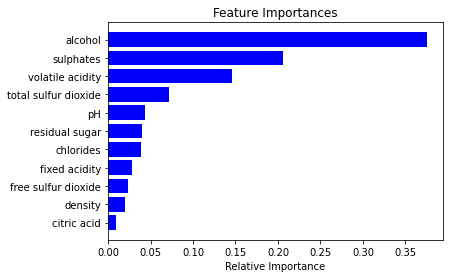

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1109,10.8,0.47,0.43,2.1,0.171,27.0,66.0,0.9982,3.17,0.76,10.8


In [107]:
#################
# Random Forest #
#################
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
rf.fit(X_train, Y_train)  
print(rf.feature_importances_)

importances = rf.feature_importances_
indices = np.argsort(importances)

features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

X_test[0:1]

In [109]:
X_test_summary = shap.kmeans(X_test, 10)

shap.initjs()
rf_explainer = shap.KernelExplainer(rf.predict, X_test_summary)
rf_shap_values = rf_explainer.shap_values(X_test)

  0%|          | 0/320 [00:00<?, ?it/s]

In [110]:
rf_explainer.expected_value

5.676879566131928

In [113]:
# plot the SHAP values for the 10th observation 
shap.force_plot(rf_explainer.expected_value, rf_shap_values[10,:], X_test.iloc[10,:]) #, link="logit")

In [114]:
shap.force_plot(rf_explainer.expected_value, rf_shap_values, X_test)

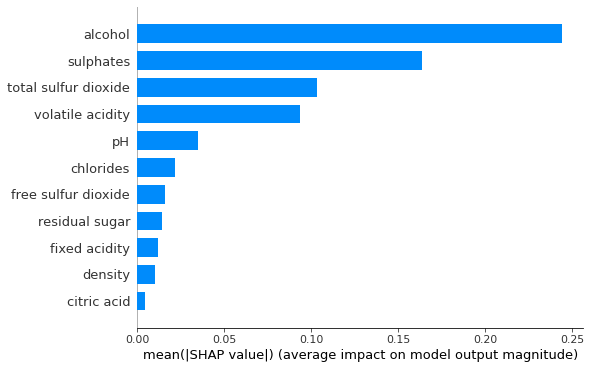

In [115]:
shap.summary_plot(rf_shap_values, X_test, plot_type="bar")

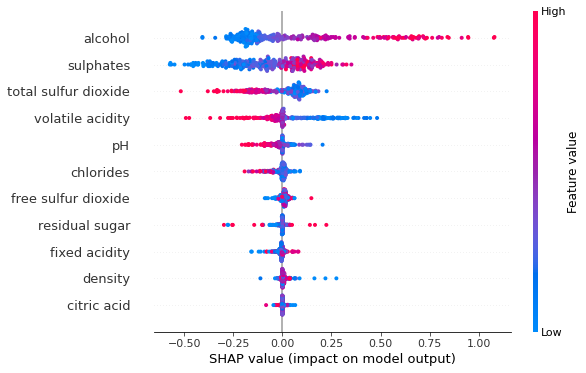

In [116]:
shap.summary_plot(rf_shap_values, X_test)

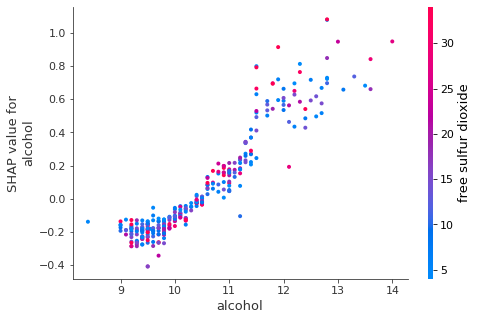

In [117]:
shap.dependence_plot("alcohol", rf_shap_values, X_test)

In [92]:
##############
#    GBM     #
##############
from sklearn import ensemble
n_estimators = 500
gbm = ensemble.GradientBoostingClassifier(
            n_estimators=n_estimators,
            validation_fraction=0.2,
            n_iter_no_change=5, 
            tol=0.01,
            random_state=0)
gbm = ensemble.GradientBoostingClassifier(
            n_estimators=n_estimators,
            random_state=0)
gbm.fit(X_train, Y_train)

GradientBoostingClassifier(n_estimators=500, random_state=0)

In [95]:
X_test_summary = shap.kmeans(X_test, 10)

gbm_explainer = shap.KernelExplainer(gbm.predict, X_test_summary)
gbm_shap_values = gbm_explainer.shap_values(X_test)

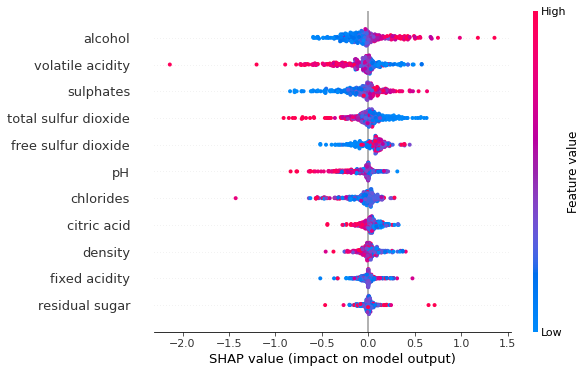

In [118]:
shap.summary_plot(gbm_shap_values, X_test)

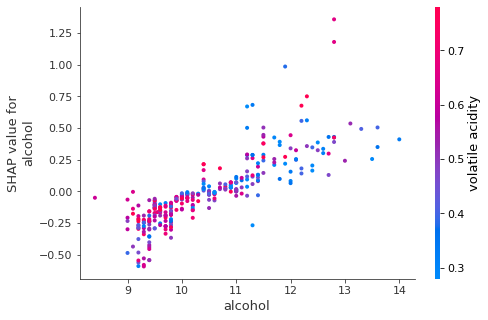

In [119]:
shap.dependence_plot("alcohol", gbm_shap_values, X_test)

In [120]:
# plot the SHAP values for the 10th observation 
shap.force_plot(gbm_explainer.expected_value, gbm_shap_values[10,:], X_test.iloc[10,:]) #, link="logit")

In [121]:
shap.force_plot(gbm_explainer.expected_value, gbm_shap_values, X_test)

In [102]:
##############
#    XGB     #
##############

from xgboost import XGBClassifier

n_estimators = 500

xgb = XGBClassifier(
            n_estimators=n_estimators,
            random_state=0)
xgb.fit(X_train, Y_train)

xgb_explainer = shap.KernelExplainer(rf.predict, X_test)
xgb_shap_values = xgb_explainer.shap_values(X_test)

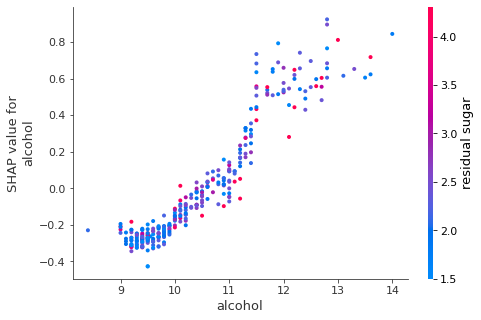

In [122]:
shap.dependence_plot("alcohol", xgb_shap_values, X_test)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[10:25:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Using 320 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/320 [00:00<?, ?it/s]

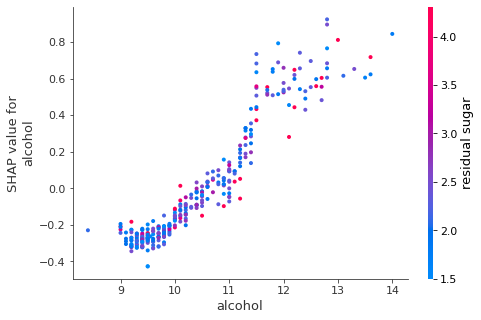

In [102]:
shap.force_plot(gbm_explainer.expected_value, gbm_shap_values, X_test)

  0%|          | 0/320 [00:00<?, ?it/s]

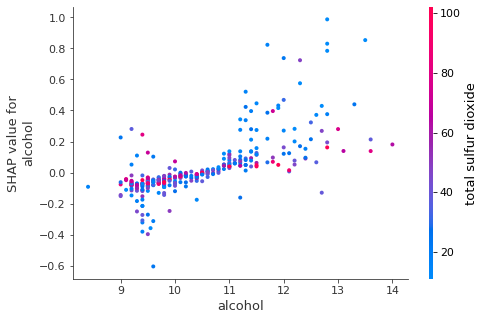

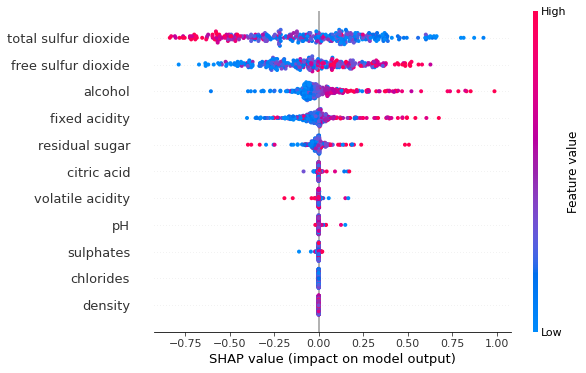

In [104]:
##############
#    KNN     #
##############

from sklearn import neighbors
n_neighbors = 15
knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knn.fit(X_train, Y_train)

knn_explainer = shap.KernelExplainer(knn.predict, X_test_summary)
knn_shap_values = knn_explainer.shap_values(X_test)

shap.dependence_plot("alcohol", knn_shap_values, X_test)

# plot the SHAP values for the 10th observation 
shap.force_plot(knn_explainer.expected_value,knn_shap_values[10,:], X_test.iloc[10,:]) 

shap.force_plot(knn_explainer.expected_value, knn_shap_values, X_test)

shap.summary_plot(knn_shap_values, X_test)

  0%|          | 0/320 [00:00<?, ?it/s]

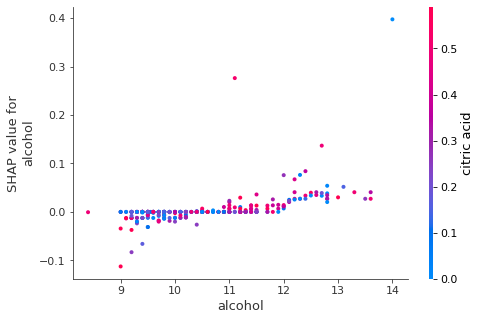

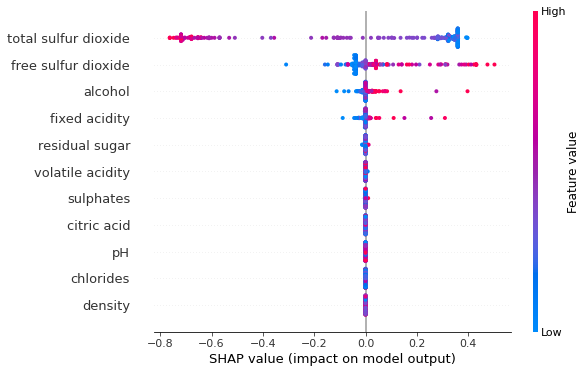

In [105]:
##############
#    SVM     #
##############

from sklearn import svm
svm = svm.SVC(gamma='scale', decision_function_shape='ovo')
svm.fit(X_train, Y_train)  

svm_explainer = shap.KernelExplainer(svm.predict, X_test_summary)
svm_shap_values = svm_explainer.shap_values(X_test)

shap.dependence_plot("alcohol", svm_shap_values, X_test)

# plot the SHAP values for the 10th observation 
shap.force_plot(svm_explainer.expected_value,svm_shap_values[10,:], X_test.iloc[10,:]) 

shap.force_plot(svm_explainer.expected_value, svm_shap_values, X_test)

shap.summary_plot(svm_shap_values, X_test)

In [ ]:
##############
#    H2O     #
##############

import h2o
from h2o.estimators.random_forest import H2ORandomForestEstimator
h2o.init()

X_train, X_test = train_test_split(df, test_size = 0.1)

X_train_hex = h2o.H2OFrame(X_train)
X_test_hex = h2o.H2OFrame(X_test)

X_names =  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

# Define model
h2o_rf = H2ORandomForestEstimator(ntrees=200, max_depth=20, nfolds=10)

# Train model
h2o_rf.train(x=X_names, y='quality', training_frame=X_train_hex)

X_test = X_test_hex.drop('quality').as_data_frame()

class H2OProbWrapper:
    def __init__(self, h2o_model, feature_names):
        self.h2o_model = h2o_model
        self.feature_names = feature_names

    def predict_binary_prob(self, X):
        if isinstance(X, pd.Series):
            X = X.values.reshape(1,-1)
        self.dataframe= pd.DataFrame(X, columns=self.feature_names)
        self.predictions = self.h2o_model.predict(h2o.H2OFrame(self.dataframe)).as_data_frame().values
        return self.predictions.astype('float64')[:,-1] #probability of True class

h2o_wrapper = H2OProbWrapper(h2o_rf,X_names)

h2o_rf_explainer = shap.KernelExplainer(h2o_wrapper.predict_binary_prob, X_test)

h2o_rf_explainer = shap.KernelExplainer(h2o_wrapper.predict_binary_prob, X_test)
h2o_rf_shap_values = h2o_rf_explainer.shap_values(X_test)

shap.summary_plot(h2o_rf_shap_values, X_test)

shap.dependence_plot("alcohol", h2o_rf_shap_values, X_test)

# plot the SHAP values for the 10th observation 
shap.force_plot(h2o_rf_explainer.expected_value,h2o_rf_shap_values[10,:], X_test.iloc[10,:]) #, link="logit")

shap.force_plot(h2o_rf_explainer.expected_value, h2o_rf_shap_values, X_test)